# Importing Libraries & Read CSV Files

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pd.set_option('display.max_columns', 500)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Read in CSV Files:
sample_sub_reg = pd.read_csv('datasets/sample_sub_reg.csv')
test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')

# Quick Glance on Datasets

In [3]:
sample_sub_reg.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [4]:
test.dtypes.to_dict()

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'MS SubClass': dtype('int64'),
 'MS Zoning': dtype('O'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'Lot Shape': dtype('O'),
 'Land Contour': dtype('O'),
 'Utilities': dtype('O'),
 'Lot Config': dtype('O'),
 'Land Slope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition 1': dtype('O'),
 'Condition 2': dtype('O'),
 'Bldg Type': dtype('O'),
 'House Style': dtype('O'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Year Built': dtype('int64'),
 'Year Remod/Add': dtype('int64'),
 'Roof Style': dtype('O'),
 'Roof Matl': dtype('O'),
 'Exterior 1st': dtype('O'),
 'Exterior 2nd': dtype('O'),
 'Mas Vnr Type': dtype('O'),
 'Mas Vnr Area': dtype('float64'),
 'Exter Qual': dtype('O'),
 'Exter Cond': dtype('O'),
 'Foundation': dtype('O'),
 'Bsmt Qual': dtype('O'),
 'Bsmt Cond': dtype('O'),
 'Bsmt Exposure': dtype('O'),
 'BsmtFin Type 1': dtype('O'),
 'BsmtFin S

In [5]:
test.shape

(879, 80)

In [6]:
train.shape

(2051, 81)

In [7]:
train.dtypes.to_dict()

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'MS SubClass': dtype('int64'),
 'MS Zoning': dtype('O'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'Lot Shape': dtype('O'),
 'Land Contour': dtype('O'),
 'Utilities': dtype('O'),
 'Lot Config': dtype('O'),
 'Land Slope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition 1': dtype('O'),
 'Condition 2': dtype('O'),
 'Bldg Type': dtype('O'),
 'House Style': dtype('O'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Year Built': dtype('int64'),
 'Year Remod/Add': dtype('int64'),
 'Roof Style': dtype('O'),
 'Roof Matl': dtype('O'),
 'Exterior 1st': dtype('O'),
 'Exterior 2nd': dtype('O'),
 'Mas Vnr Type': dtype('O'),
 'Mas Vnr Area': dtype('float64'),
 'Exter Qual': dtype('O'),
 'Exter Cond': dtype('O'),
 'Foundation': dtype('O'),
 'Bsmt Qual': dtype('O'),
 'Bsmt Cond': dtype('O'),
 'Bsmt Exposure': dtype('O'),
 'BsmtFin Type 1': dtype('O'),
 'BsmtFin S

Train have 81 Columns, consisting SalePrice, Test have 80 columns without SalePrice

# Data Dictionary

|Feature|Type|Variable Type|Description|
|---|---|---|---|
|**Id**|*Int*|Discrete|Observation Number|
|**PID**|*Int*|Nominal|Parcel identification number|
|**MS SubClass**|*Int*|Nominal|The building class: **20** = 1-STORY 1946 & NEWER ALL STYLES, **30** = 1-STORY 1945 & OLDER, **40** = 1-STORY W/FINISHED ATTIC ALL AGES, **45** = 1-1/2 STORY - UNFINISHED ALL AGES, **50** = 1-1/2 STORY FINISHED ALL AGES, **60** = 2-STORY 1946 & NEWER, **70** = 2-STORY 1945 & OLDER, **75** = 2-1/2 STORY ALL AGES, **80** = SPLIT OR MULTI-LEVEL, **85** = SPLIT FOYER, **90** = DUPLEX - ALL STYLES AND AGES, **120** = 1-STORY PUD (Planned Unit Development) - 1946 & NEWER, **150** = 1-1/2 STORY PUD - ALL AGES, **160** = 2-STORY PUD - 1946 & NEWER, **180** = PUD - MULTILEVEL - INCL SPLIT LEV/FOYER, **190** = 2 FAMILY CONVERSION - ALL STYLES AND AGES|
|**MS Zoning**|*Object*|Nominal|Identifies the general zoning classification of the sale. **A** = Agriculture, **C** = Commercial, **FV** = Floating Village Residential, **I** = Industrial, **RH** = Residential High Density, **RL** = Residential Low Density, **RP** = Residential Low Density Park, **RM** = Residential Medium Density|
|**Lot Frontage**|*Float*|Continuous|Linear feet of street connected to property|
|**Lot Area**|*Int*|Continuous|Lot size in square feet|
|**Street**|*Object*|Nominal|Type of road access to property: Grvl Gravel or Pave Paved|
|**Alley**|*Object*|Nominal|Type of alley access to property: **Grvl Gravel** or **Pave Paved** or **NA** = No alley access|
|**Lot Shape**|*Object*|Ordinal|General shape of property: **Reg** = Regular, **IR1** = Slightly irregular, **IR2** = Moderately Irregular, **IR3** = Irregular|
|**Land Contour**|*Object*|Nominal|Flatness of the property: **Lvl** = Near Flat/Level, **Bnk** = Banked - Quick and significant rise from street grade to building, **HLS** = Hillside - Significant slope from side to side, **Low** = Depression|
|**Utilities**|*Object*|Ordinal|Type of utilities available: **AllPub** = All public Utilities (E,G,W,& S), **NoSewr** = Electricity, Gas, and Water (Septic Tank), **NoSeWa** = Electricity and Gas Only, **ELO** = Electricity only|
|**Lot Config**|*Object*|Nominal|Lot configuration: **Inside** = Inside lot, **Corner** = Corner lot, **CulDSac** = Cul-de-sac, **FR2** = Frontage on 2 sides of property, **FR3** = Frontage on 3 sides of property|
|**Land Slope**|*Object*|Ordinal|Slope of property: **Gtl** = Gentle slope, **Mod** = Moderate Slope, **Sev** = Severe Slope|
|**Neighbourhood**|*Object*|Nominal|Physical locations within Ames city limits: **Blmngtn** = Bloomington Heights, **Blueste** = Bluestem, **BrDale** = Briardale, **BrkSide** = Brookside, **ClearCr** = Clear Creek, **CollgCr** = College Creek, **Crawfor** = Crawford, **Edwards** = Edwards, **Gilbert** = Gilbert, **IDOTRR** = Iowa DOT and Rail Road, **MeadowV** = Meadow Village, **Mitchel** = Mitchell, **Names** = North Ames, **NoRidge** = Northridge, **NPkVill** = Northpark Villa, **NridgHt** = Northridge Heights, **NWAmes** = Northwest Ames, **OldTown** = Old Town, **SWISU** = South & West of Iowa State University, **Sawyer** = Sawyer, **SawyerW** = Sawyer West, **Somerst** = Somerset, **StoneBr** = Stone Brook, **Timber** = Timberland, **Veenker** = Veenker|
|**Condition 1**|*Object*|Nominal|Proximity to main road or railroad: **Artery** = Adjacent to arterial street, **Feedr** = Adjacent to feeder street, **Norm** = Normal, **RRNn** = Within 200' of North-South Railroad, **RRAn** = Adjacent to North-South Railroad, **PosN** = Near positive off-site feature--park, greenbelt, etc., **PosA** = Adjacent to postive off-site feature, **RRNe** = Within 200' of East-West Railroad, **RRAe** = Adjacent to East-West Railroad|
|**Condition 2**|*Object*|Nominal|Proximity to main road or railroad (if a second is present): **Artery** = Adjacent to arterial street, **Feedr** = Adjacent to feeder street, **Norm** = Normal, **RRNn** = Within 200' of North-South Railroad, **RRAn** = Adjacent to North-South Railroad, **PosN** = Near positive off-site feature--park, greenbelt, etc., **PosA** = Adjacent to postive off-site feature, **RRNe** = Within 200' of East-West Railroad, **RRAe** = Adjacent to East-West Railroad|
|**Bldg Type**|*Object*|Nominal|Type of dwelling: **1Fam** = Single-family Detached, **2FmCon** = Two-family Conversion; originally built as one-family dwelling, **Duplx** = Duplex, **TwnhsE** = Townhouse End Unit, **TwnhsI** = Townhouse Inside Unit|
|**House Style**|*Object*|Nominal|Style of dwelling: **1Story** = One story, **1.5Fin** = One and one-half story: 2nd level finished, **1.5Unf** = One and one-half story: 2nd level unfinished, **2Story** = Two story, **2.5Fin** = Two and one-half story: 2nd level finished, **2.5Unf** = Two and one-half story: 2nd level unfinished, **SFoyer** = Split Foyer, **SLvl** = Split Level|
|**Overall Qual**|*Int*|Ordinal|Overall material and finish quality rating: 1-10 (1 = Very Poor, 10 = Excellent)|
|**Overall Cond**|*Int*|Ordianl|Overall condition rating: 1-10 (1 = Very Poor, 10 = Excellent)|
|**Year Built**|*Int*|Discrete|Original construction date|
|**Year Remod/Add**|*Int*|Discrete|Remodel date (same as construction date if no remodeling or additions)|
|**Roof Style**|*Object*|Nominal|Type of roof: **Flat** = Flat, **Gable** = Gable, **Gambrel** = Gabrel (Barn), **Hip** = Hip, **Mansard** = Mansard, **Shed** = Shed|
|**Roof Matl**|*Object*|Nominal|Roof material: **ClyTile** = Clay or Tile, **CompShg** = Standard (Composite) Shingle, **Membran** = Membrane, **Metal** = Metal, **Roll** = Roll, **Tar&Grv** = Gravel & Tar, **WdShake** = Wood Shakes, **WdShngl** = Wood Shingles|
|**Exterior 1st**|*Object*|Nominal|Exterior covering on house: **AsbShng** = Asbestos Shingles, **AsphShn** = Asphalt Shingles, **BrkComm** = Brick Common, **BrkFace** = Brick Face, **CBlock** = Cinder Block, **CemntBd** = Cement Board, **HdBoard** = Hard Board, **ImStucc** = Imitation Stucco, **MetalSd** = Metal Siding, **Other** = Other, **Plywood** = Plywood, **PreCast** = PreCast, **Stone** = Stone, **Stucco** = Stucco, **VinylSd** = Vinyl Siding, **WdSdng** = Wood Siding, **WdShing** = Wood Shingles|
|**Exterior 2nd**|*Object*|Nominal|Exterior covering on house (if more than one material): **AsbShng** = Asbestos Shingles, **AsphShn** = Asphalt Shingles, **BrkComm** = Brick Common, **BrkFace** = Brick Face, **CBlock** = Cinder Block, **CemntBd** = Cement Board, **HdBoard** = Hard Board, **ImStucc** = Imitation Stucco, **MetalSd** = Metal Siding, **Other** = Other, **Plywood** = Plywood, **PreCast** = PreCast, **Stone** = Stone, **Stucco** = Stucco, **VinylSd** = Vinyl Siding, **WdSdng** = Wood Siding, **WdShing** = Wood Shingles|
|**Mas Vnr Type**|*Object*|Nominal|Masonry veneer type: **BrkCmn** = Brick Common, **BrkFace** = Brick Face, **CBlock** = Cinder Block, **None** = None, **Stone** = Stone|
|**Mas Vnr Area**|*Float*|Continuous|Masonry veneer area in square feet|
|**Exter Qual**|*Object*|Ordinal|Exterior material quality: **Ex** = Excellent, **Gd** = Good, **TA** = Average/Typical, **Fa** = Fair, **Po** = Poor|
|**Exter Cond**|*Object*|Nominal|Present condition of the material on the exterior: **Ex** = Excellent, **Gd** = Good, **TA** = Average/Typical, **Fa** = Fair, **Po** = Poor|
|**Foundation**|*Object*|Nominal|Type of foundation: **BrkTil** = Brick & Tile, **CBlock** = Cinder Block, **PConc** = Poured Contrete, **Slab** = Slab, **Stone** = Stone, **Wood** = Wood|
|**Bsmt Qual**|*Object*|Ordinal|Height of the basement: **Ex** = Excellent (100+ inches), **Gd** = Good (90-99 inches), **TA** = Typical (80-89 inches), **Fa** = Fair (70-79 inches), **Po** = Poor (<70 inches), **NA** = No Basement|
|**Bsmt Cond**|*Object*|Ordinal|General condition of the basement: **Ex** = Excellent, **Gd** = Good, **TA** = Typical - slight dampness allowed, **Fa** = Fair - dampness or some cracking or settling, **Po** = Poor - Severe cracking, settling, or wetness, **NA** = No Basement|
|**Bsmt Exposure**|*Object*|Ordinal|Walkout or garden level basement walls: **Gd** = Good Exposure, **Av** = Average Exposure (split levels or foyers typically score average or above), **Mn** = Mimimum Exposure, **No** = No Exposure, **NA** = No Basement|
|**BsmtFin Type 1**|*Object*|Ordinal|Quality of basement finished area: **GLQ** = Good Living Quarters, **ALQ** = Average Living Quarters, **BLQ** = Below Average Living Quarters, **Rec** = Average Rec Room, **LwQ** = Low Quality, **Unf** = Unfinshed, **NA** = No Basement|
|**BsmtFin SF 1**|*Float*|Continuous|Type 1 finished square feet|
|**BsmtFin Type 2**|*Object*|Ordinal|Quality of second finished area (if present): **GLQ** = Good Living Quarters, **ALQ** = Average Living Quarters, **BLQ** = Below Average Living Quarters, **Rec** = Average Rec Room, **LwQ** = Low Quality, **Unf** = Unfinshed,**NA** = No Basement|
|**BsmtFin SF 2**|*Float*|Continuous|Type 2 finished square feet|
|**Bsmt Unf SF**|*Float*|Continuous|Unfinished square feet of basement area|
|**Total Bsmt SF**|*Float*|Continuous|Total square feet of basement area|
|**Heating**|*Object*|Nominal|Type of heating: **Floor** = Floor Furnace, **GasA** = Gas forced warm air furnace, **GasW** = Gas hot water or steam heat, **Grav** = Gravity furnace, **OthW** = Hot water or steam heat other than gas, **Wall** = Wall furnace|
|**Heating QC**|*Object*|Ordinal|Heating quality and condition: **Ex** = Excellent, **Gd** = Good, **TA** = Average/Typical, **Fa** = Fair, **Po** = Poor|
|**Central Air**|*Object*|Nominal|Central air conditioning: **N** = No, **Y** = Yes|
|**Electrical**|*Object*|Ordinal|Electrical system: **SBrkr** = Standard Circuit Breakers & Romex, **FuseA** = Fuse Box over 60 AMP and all Romex wiring (Average), **FuseF** = 60 AMP Fuse Box and mostly Romex wiring (Fair), **FuseP** = 60 AMP Fuse Box and mostly knob & tube wiring (poor), **Mix** = Mixed|
|**1st Flr SF**|*Int*|Continuous|First Floor square feet|
|**2nd Flr SF**|*Int*|Continuous|Second floor square feet|
|**Low Qual Fin SF**|*Int*|Continuous|Low quality finished square feet (all floors)|
|**GR Liv Area**|*Int*|Continuous|Above grade (ground) living area square feet|
|**Bsmt Full Bath**|*Float*|Discrete|Basement full bathrooms|
|**Bsmt Half Bath**|*Float*|Discrete|Basement half bathrooms|
|**Full Bath**|*Int*|Discrete|Full bathrooms above grade|
|**Half Bath**|*Int*|Discrete|Half baths above grade|
|**Bedroom AbvGr**|*Int*|Discrete|Number of bedrooms above basement level|
|**Kitchen AbvGr**|*Int*|Discrete|Number of kitchens|
|**Kitchen Qual**|*Object*|Ordinal|Kitchen quality: **Ex** = Excellent, **Gd** = Good, **TA** = Typical/Average, **Fa** = Fair, **Po** = Poor|
|**TotRms AbvGrd**|*Int*|Discrete|Total rooms above grade (does not include bathrooms)|
|**Functional**|*Object*|Ordinal|Home functionality rating: **Typ** = Typical Functionality, **Min1** = Minor Deductions 1, **Min2** = Minor Deductions 2, **Mod** = Moderate Deductions, **Maj1** = Major Deductions 1, **Maj2** = Major Deductions 2, **Sev** = Severely Damaged, **Sal** = Salvage only|
|**Fireplaces**|*Int*|Discrete|Number of fireplaces|
|**Fireplace Qu**|*Object*|Ordinal|Fireplace quality: **Ex** = Excellent - Exceptional Masonry Fireplace, **Gd** = Good - Masonry Fireplace in main level, **TA** = Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement, **Fa** = Fair - Prefabricated Fireplace in basement, **Po** = Poor - Ben Franklin Stove, **NA** = No Fireplace|
|**Garage Type**|*Object*|Nominal|Garage location: **2Types** = More than one type of garage, **Attchd** = Attached to home, **Basment** = Basement Garage, **BuiltIn** = Built-In (Garage part of house - typically has room above garage), **CarPort** = Car Port, **Detchd** = Detached from home, **NA** = No Garage|
|**Garage Yr Blt**|*Float*|Discrete|Year garage was built|
|**Garage Finish**|*Object*|Ordinal|Interior finish of the garage: **Fin** = Finished, **RFn** = Rough Finished, **Unf** = Unfinished, **NA** = No Garage|
|**Garage Cars**|*Float*|Discrete|Size of garage in car capacity|
|**Garage Area**|*Float*|Continuous|Size of garage in square feet|
|**Garage Qual**|*Object*|Ordinal|Garage quality: **Ex** = Excellent, **Gd** = Good, **TA** = Typical/Average, **Fa** = Fair, **Po** = Poor, **NA** = No Garage|
|**Garage Cond**|*Object*|Ordinal|Garage condition: **Ex** = Excellent, **Gd** = Good, **TA** = Typical/Average, **Fa** = Fair, **Po** = Poor, **NA** = No Garage|
|**Paved Drive**|*Object*|Ordinal|Paved driveway: **Y** = Paved, **P** = Partial Pavement, **N** = Dirt/Gravel|
|**Wood Deck SF**|*Int*|Continuous|Wood deck area in square feet|
|**Open Porch SF**|*Int*|Continuous|Open porch area in square feet|
|**Enclosed Porch**|*Int*|Continuous|Enclosed porch area in square feet|
|**3Ssn Porch**|*Int*|Continuous|Three season porch area in square feet|
|**Screen Porch**|*Int*|Continuous|Screen porch area in square feet|
|**Pool Area**|*Int*|Continuous|Pool area in square feet|
|**Pool QC**|*Object*|Ordinal|Pool quality: **Ex** = Excellent, **Gd** = Good, **TA** = Average/Typical, **Fa** = Fair, **NA** = No Pool|
|**Fence**|*Object*|Ordinal|Fence quality: **GdPrv** = Good Privacy, **MnPrv** = Minimum Privacy, **GdWo** = Good Wood, **MnWw** = Minimum Wood/Wire, **NA** = No Fence|
|**Misc Feature**|*Object*|Norminal|Miscellaneous feature not covered in other categories: **Elev** = Elevator, **Gar2** = 2nd Garage (if not described in garage section), **Othr** = Other, **Shed** = Shed (over 100 SF), **TenC** = Tennis Court, **NA** = None|
|**Misc Val**|*Int*|Continuous|$Value of miscellaneous feature|
|**Mo Sold**|*Int*|Discrete|Month Sold|
|**Yr Sold**|*Int*|Discrete|Year Sold|
|**Sale Type**|*Object*|Nominal|Type of sale: **WD** = Warranty Deed - Conventional, **CWD** = Warranty Deed - Cash, **VWD** = Warranty Deed - VA Loan, **New** = Home just constructed and sold, **COD** = Court Officer Deed/Estate, **Con** = Contract 15% Down payment regular terms, **ConLw** = Contract Low Down payment and low interest, **ConLI** = Contract Low Interest, **ConLD** = Contract Low Down, **Oth** = Other|
|**Sale Price**|*Int*|Continuous |The property's sale price in dollars|


## Project Objective:
       1) Use the data given: 'train', clean and select predictors to generate a good prediction model
       2) Use 'test' with the given model to predict Sales Price
       3) Format should be similiar to the format given in 'sample_sub_reg' for kaggle submission
   
## Problem Statement:
       Help to give a better prediction in sales price with more important predictors

# Data Cleaning

### Special notes 
    5 observations to remove from dataset - a plot of SALE PRICE versus GR LIV AREA will indicate them quickly 
    •	Three of them are true outliers (Partial Sales that likely don’t represent actual market values)
    •	Two of them are simply unusual sales (very large houses priced relatively appropriately)
    Recommendation: Remove any houses with more than 4000 square feet from the data set

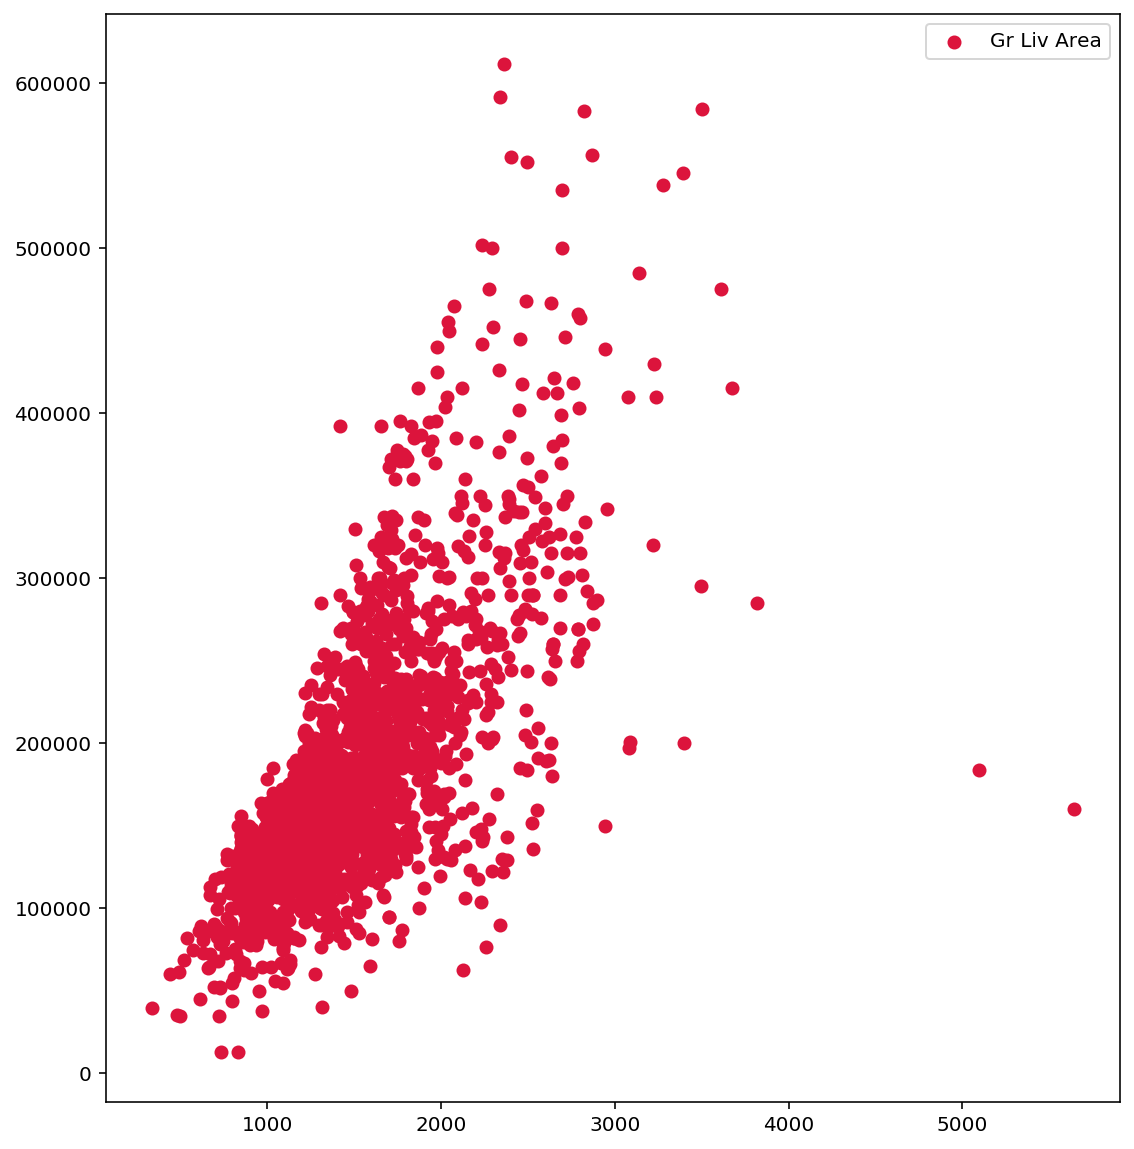

In [8]:
# checking for outliers
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

ax1.scatter(train['Gr Liv Area'],train['SalePrice'], color = 'crimson', label = 'Gr Liv Area')

ax1.legend()

plt.show()

In [9]:
train.shape

(2051, 81)

In [10]:
#Removing observations that have 'Gr Liv Area'] > 4000
train = train.drop(train[train['Gr Liv Area'] > 4000].index)
print(train.shape)
train = train.drop(train[train['Gr Liv Area'] > 4000].index)

(2049, 81)


In [11]:
# train : Checking for null/Na Values in each column 
for null_values in train:
    df_null_values = train[null_values].isnull().sum()
    if df_null_values != 0:        
        print(f'{null_values}: {df_null_values} nulls')

Lot Frontage: 330 nulls
Alley: 1909 nulls
Mas Vnr Type: 22 nulls
Mas Vnr Area: 22 nulls
Bsmt Qual: 55 nulls
Bsmt Cond: 55 nulls
Bsmt Exposure: 58 nulls
BsmtFin Type 1: 55 nulls
BsmtFin SF 1: 1 nulls
BsmtFin Type 2: 56 nulls
BsmtFin SF 2: 1 nulls
Bsmt Unf SF: 1 nulls
Total Bsmt SF: 1 nulls
Bsmt Full Bath: 2 nulls
Bsmt Half Bath: 2 nulls
Fireplace Qu: 1000 nulls
Garage Type: 113 nulls
Garage Yr Blt: 114 nulls
Garage Finish: 114 nulls
Garage Cars: 1 nulls
Garage Area: 1 nulls
Garage Qual: 114 nulls
Garage Cond: 114 nulls
Pool QC: 2041 nulls
Fence: 1649 nulls
Misc Feature: 1985 nulls


In [12]:
# test : Checking for null/Na Values in each column 
for null_values in test:
    df_null_values = test[null_values].isnull().sum()
    if df_null_values != 0:        
        print(f'{null_values}: {df_null_values} nulls')

Lot Frontage: 160 nulls
Alley: 821 nulls
Mas Vnr Type: 1 nulls
Mas Vnr Area: 1 nulls
Bsmt Qual: 25 nulls
Bsmt Cond: 25 nulls
Bsmt Exposure: 25 nulls
BsmtFin Type 1: 25 nulls
BsmtFin Type 2: 25 nulls
Electrical: 1 nulls
Fireplace Qu: 422 nulls
Garage Type: 44 nulls
Garage Yr Blt: 45 nulls
Garage Finish: 45 nulls
Garage Qual: 45 nulls
Garage Cond: 45 nulls
Pool QC: 875 nulls
Fence: 707 nulls
Misc Feature: 838 nulls


# Using df['column'].unique() to find suspecious data(s)

In [13]:
# found 2207 as an incorrect data
train['Garage Yr Blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [14]:
# inferring that the true data for the wrong data is 2007 based on Year Built and Year Remod/Add
train[train['Garage Yr Blt']==2207][['Year Built','Year Remod/Add','Garage Yr Blt']]

,Year Built,Year Remod/Add,Garage Yr Blt
1699,2006,2007,2207.0


In [15]:
# 'correcting' the incorrect data
train.at[1699,'Garage Yr Blt'] = 2007

In [16]:
train['Garage Yr Blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 1933., 1895.,
       1919.])

# Data Cleaning: Dropping columns with similiar informations

In [17]:
# 'Id' = no. of observation, is indexed in the DF, we only need PID to track, id is just a count of observations. 
train.drop(labels = ['Id'], axis = 1, inplace = True)
# retaining the order of 'Id' in a varaible for Kaggle format submission purposes
test_id = test['Id']
test.drop(labels = ['Id'], axis = 1, inplace = True)

In [18]:
# 'Garage Yr Blt' is well represented together with 'Year Built', hence  data
train.drop(labels = ['Garage Yr Blt'], axis = 1, inplace = True)
test.drop(labels = ['Garage Yr Blt'], axis = 1, inplace = True)

In [19]:
# 'Garage Cars'  &  'Garage Area' tells the same information, droping 'Garage Cars' and keep 'Garage Area'
train.drop(labels = ['Garage Cars'], axis = 1, inplace = True)
test.drop(labels = ['Garage Cars'], axis = 1, inplace = True)

In [20]:
# 'Total Bsmt SF' - 'Bsmt Unf SF' = Total Finished Basement, therefore, can drop 'BsmtFin SF 2'  &  'BsmtFin SF 1'
train.drop(labels = ['BsmtFin SF 1','BsmtFin SF 2'], axis = 1, inplace = True)
test.drop(labels = ['BsmtFin SF 1','BsmtFin SF 2'], axis = 1, inplace = True)

In [21]:
# Remove '1st Flr SF','2nd Flr SF','Low Qual Fin SF'  because the sum of these 3 is 'GR Liv Area'
train.drop(labels = ['1st Flr SF','2nd Flr SF','Low Qual Fin SF'], axis = 1, inplace = True)
test.drop(labels = ['1st Flr SF','2nd Flr SF','Low Qual Fin SF'], axis = 1, inplace = True)

In [22]:
len(train.columns)

73

In [23]:
len(test.columns)

72

# Feature Engineering: Making Sense of the columns
### Merging/Manipulate informations and creating new Columns 

In [24]:
# 'Year Remod/Add' and 'Year Built'
# if 'Year Remod/Add'  =  Year Built' , means the house not remodelled ('Remodeled Y/N' = No)
# if 'Year Remod/Add'  =  Year Built' , means the house is remodelled ('Remodeled Y/N' = Yes)
train['Remodeled Y/N'] = np.where(train['Year Remod/Add'] == train['Year Built'], 'No', 'Yes')
train['Remodeled Y/N'] = train['Remodeled Y/N'].astype('str')
# doing the same for test set to ensure same columns 
test['Remodeled Y/N'] = np.where(test['Year Remod/Add'] == test['Year Built'], 'No', 'Yes')
test['Remodeled Y/N'] = test['Remodeled Y/N'].astype('str')

In [25]:
# 'Yr Sold'  and  'Year Remod/Add'
# age of house can be defined by the year difference between 'Year Remod/Add'  &  'Yr Sold'
train['Age when Sold'] = train['Yr Sold'] - train['Year Remod/Add']
# doing the same for test set to ensure same columns 
test['Age when Sold'] = test['Yr Sold'] - test['Year Remod/Add']

In [26]:
# Totaling up Sq Area for the entire house: 
train['totSqFt'] = train['Total Bsmt SF'] + train['Gr Liv Area']
# doing the same for test set to ensure same columns 
test['totSqFt'] = test['Total Bsmt SF'] + test['Gr Liv Area']

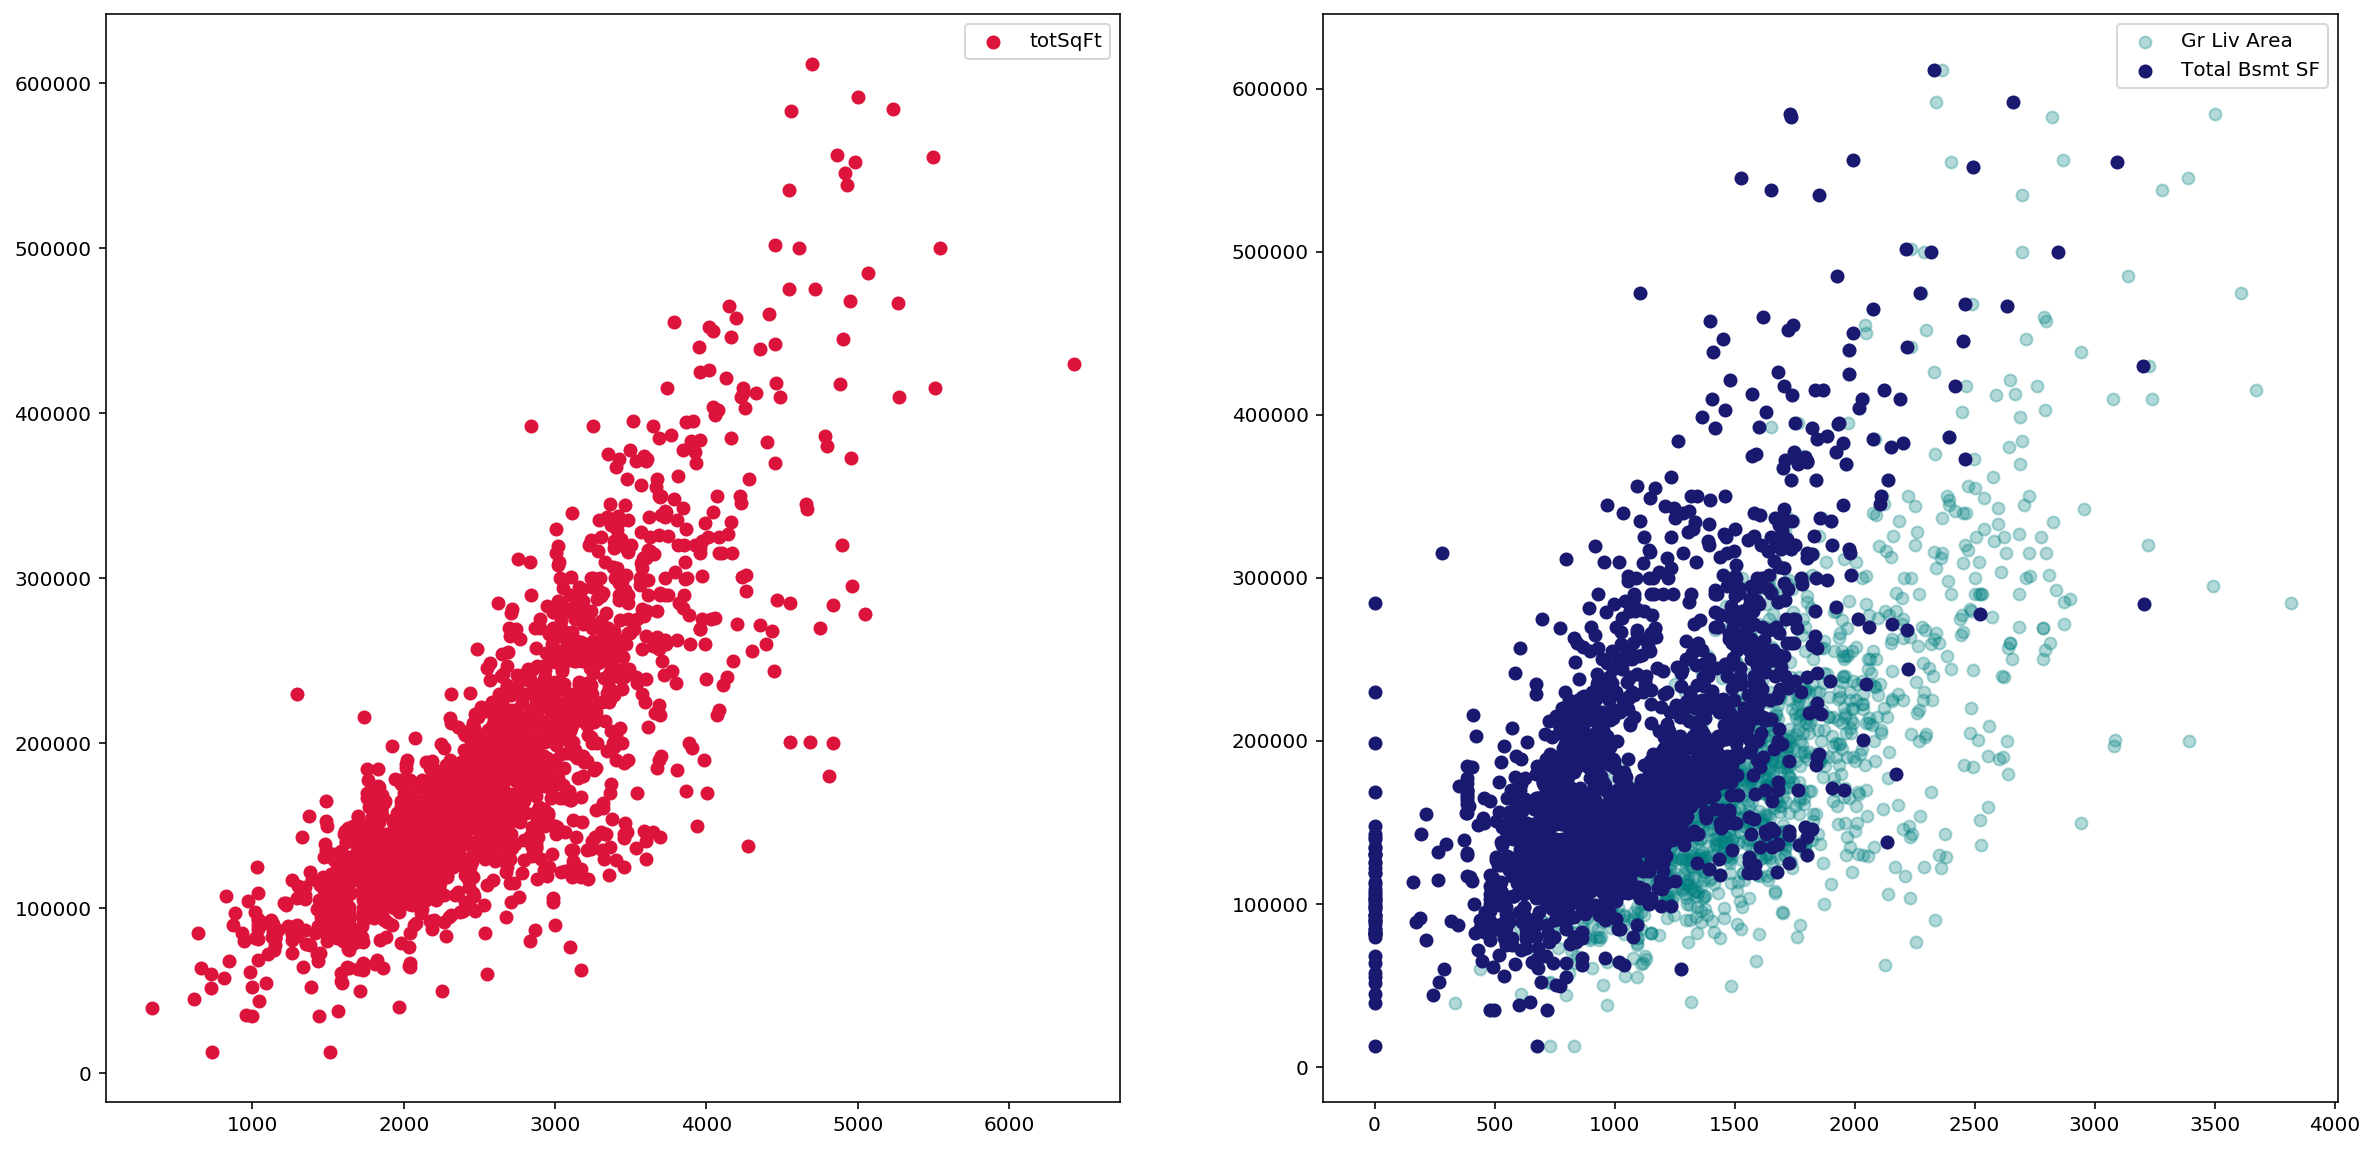

In [27]:
# checking if the newly created variable is representative of the individually merged features
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(train['totSqFt'],train['SalePrice'], color = 'crimson', label = 'totSqFt')
ax2.scatter(train['Gr Liv Area'],train['SalePrice'], color = 'teal', alpha = 0.3, label ='Gr Liv Area')
ax2.scatter(train['Total Bsmt SF'],train['SalePrice'], color = 'midnightblue', label = 'Total Bsmt SF')

ax1.legend()
ax2.legend()
plt.show()

In [28]:
# Totaling up Sq Area for Porch Area: 
train['totPorchSqFt'] = train['Open Porch SF'] + train['Enclosed Porch'] + train['3Ssn Porch'] + train['Screen Porch']
# doing the same for test set to ensure same columns 
test['totPorchSqFt'] = test['Open Porch SF'] + test['Enclosed Porch'] + test['3Ssn Porch'] + test['Screen Porch']

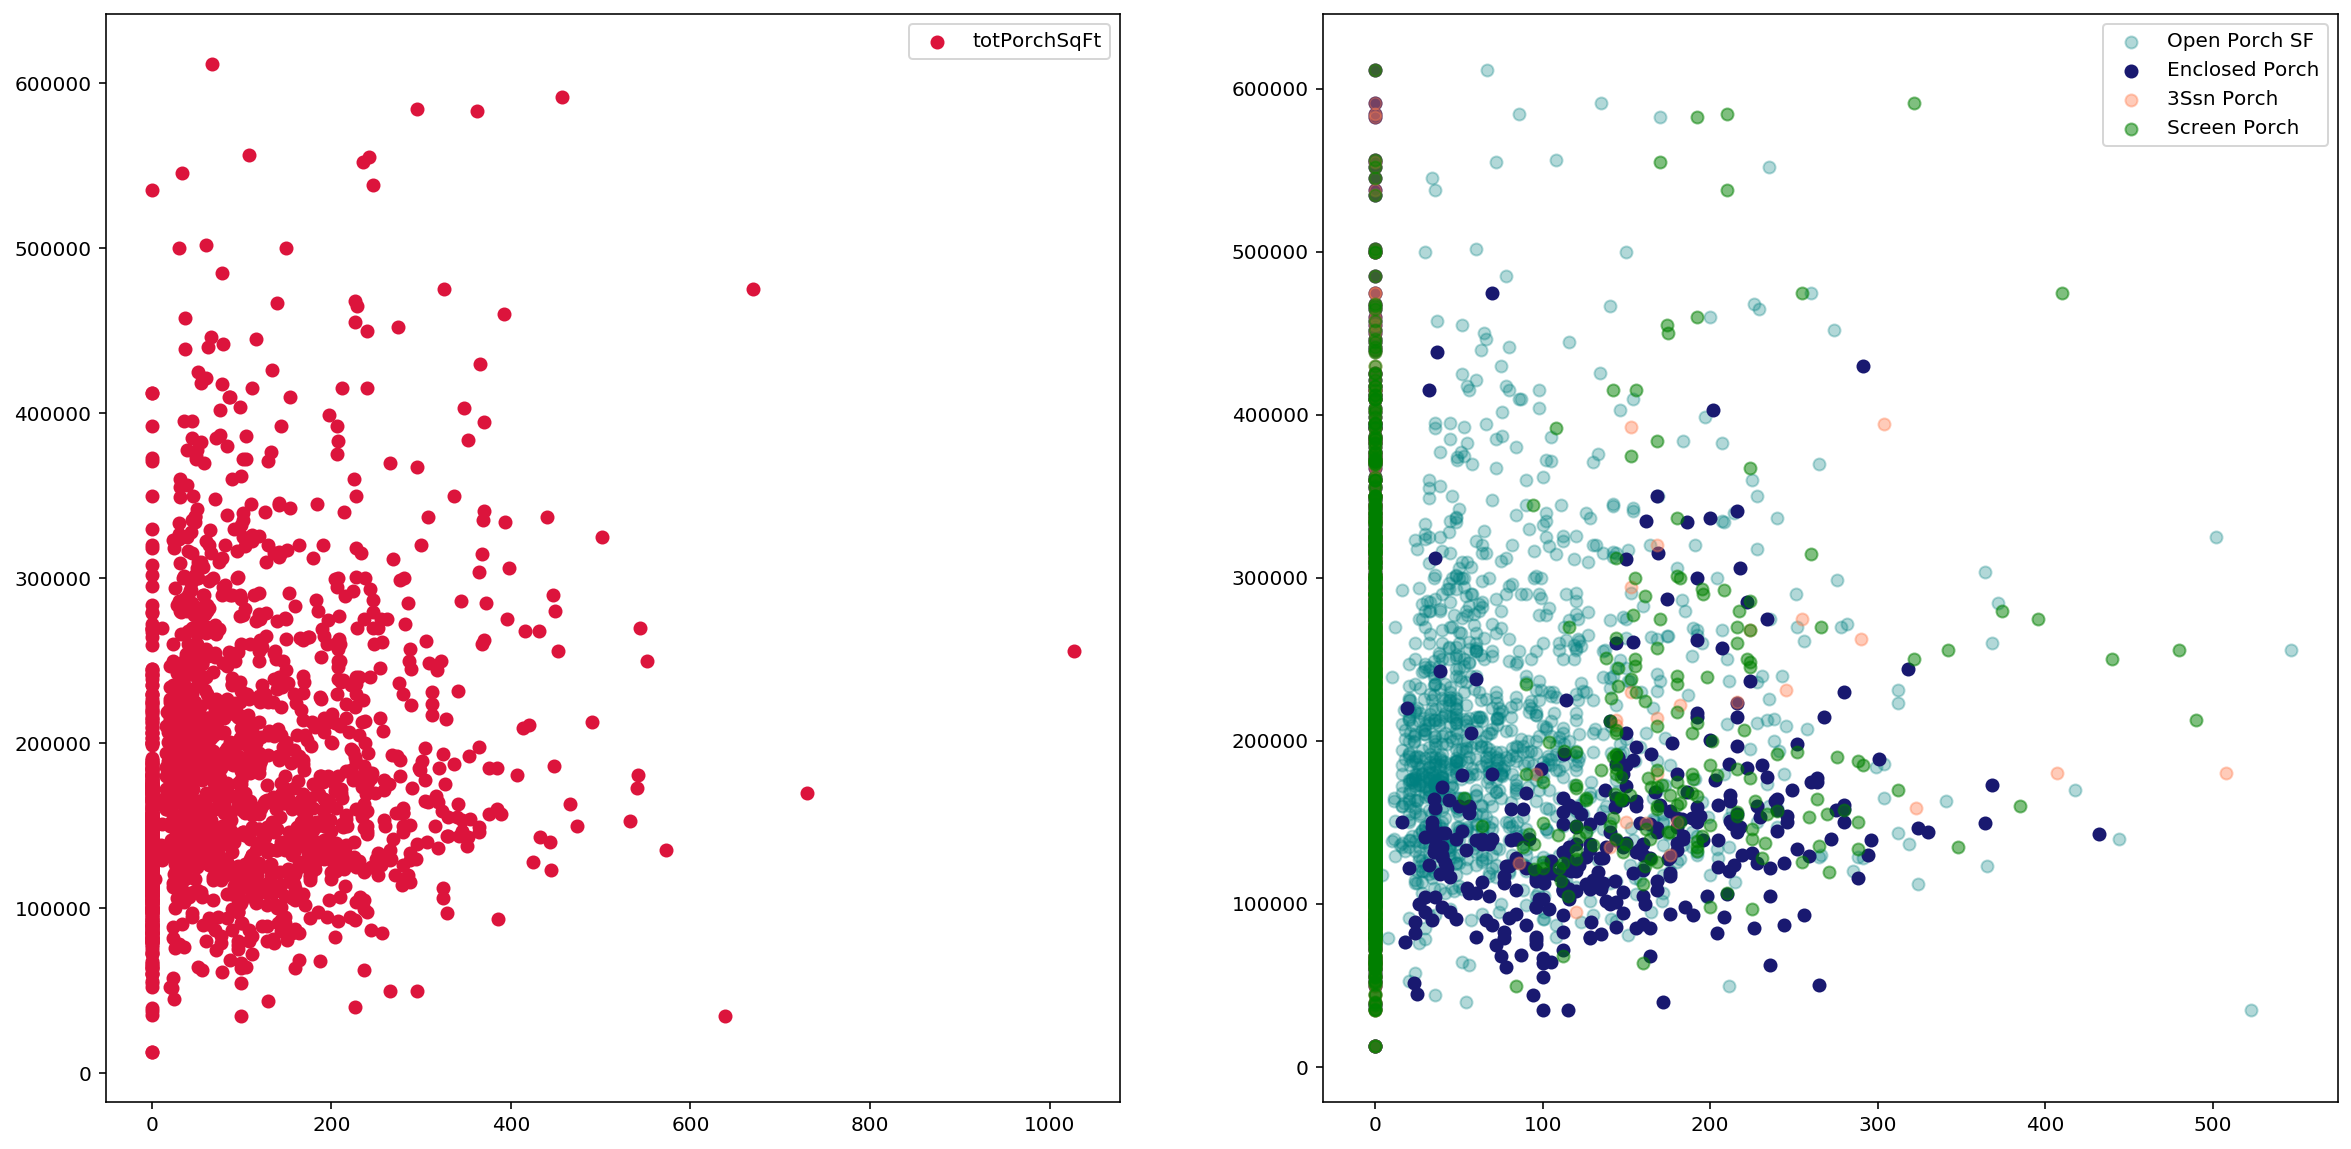

In [29]:
# checking if the newly created variable is representative of the individually merged features
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(train['totPorchSqFt'],train['SalePrice'], color = 'crimson', label = 'totPorchSqFt')
ax2.scatter(train['Open Porch SF'],train['SalePrice'], color = 'teal', alpha = 0.3, label ='Open Porch SF')
ax2.scatter(train['Enclosed Porch'],train['SalePrice'], color = 'midnightblue', label = 'Enclosed Porch')
ax2.scatter(train['3Ssn Porch'],train['SalePrice'], color = 'coral', alpha = 0.4, label = '3Ssn Porch')
ax2.scatter(train['Screen Porch'],train['SalePrice'], color = 'green', alpha = 0.5, label = 'Screen Porch')
ax1.legend()
ax2.legend()
plt.show()

In [30]:
# Totaling the Sq Area for the bathrooms:
train['totBathRm'] = train['Full Bath'] + 0.5*train['Half Bath'] + train['Bsmt Full Bath'] + 0.5*train['Bsmt Half Bath']
# doing the same for test set to ensure same columns 
test['totBathRm'] = test['Full Bath'] + 0.5*test['Half Bath'] + test['Bsmt Full Bath'] + 0.5*test['Bsmt Half Bath']

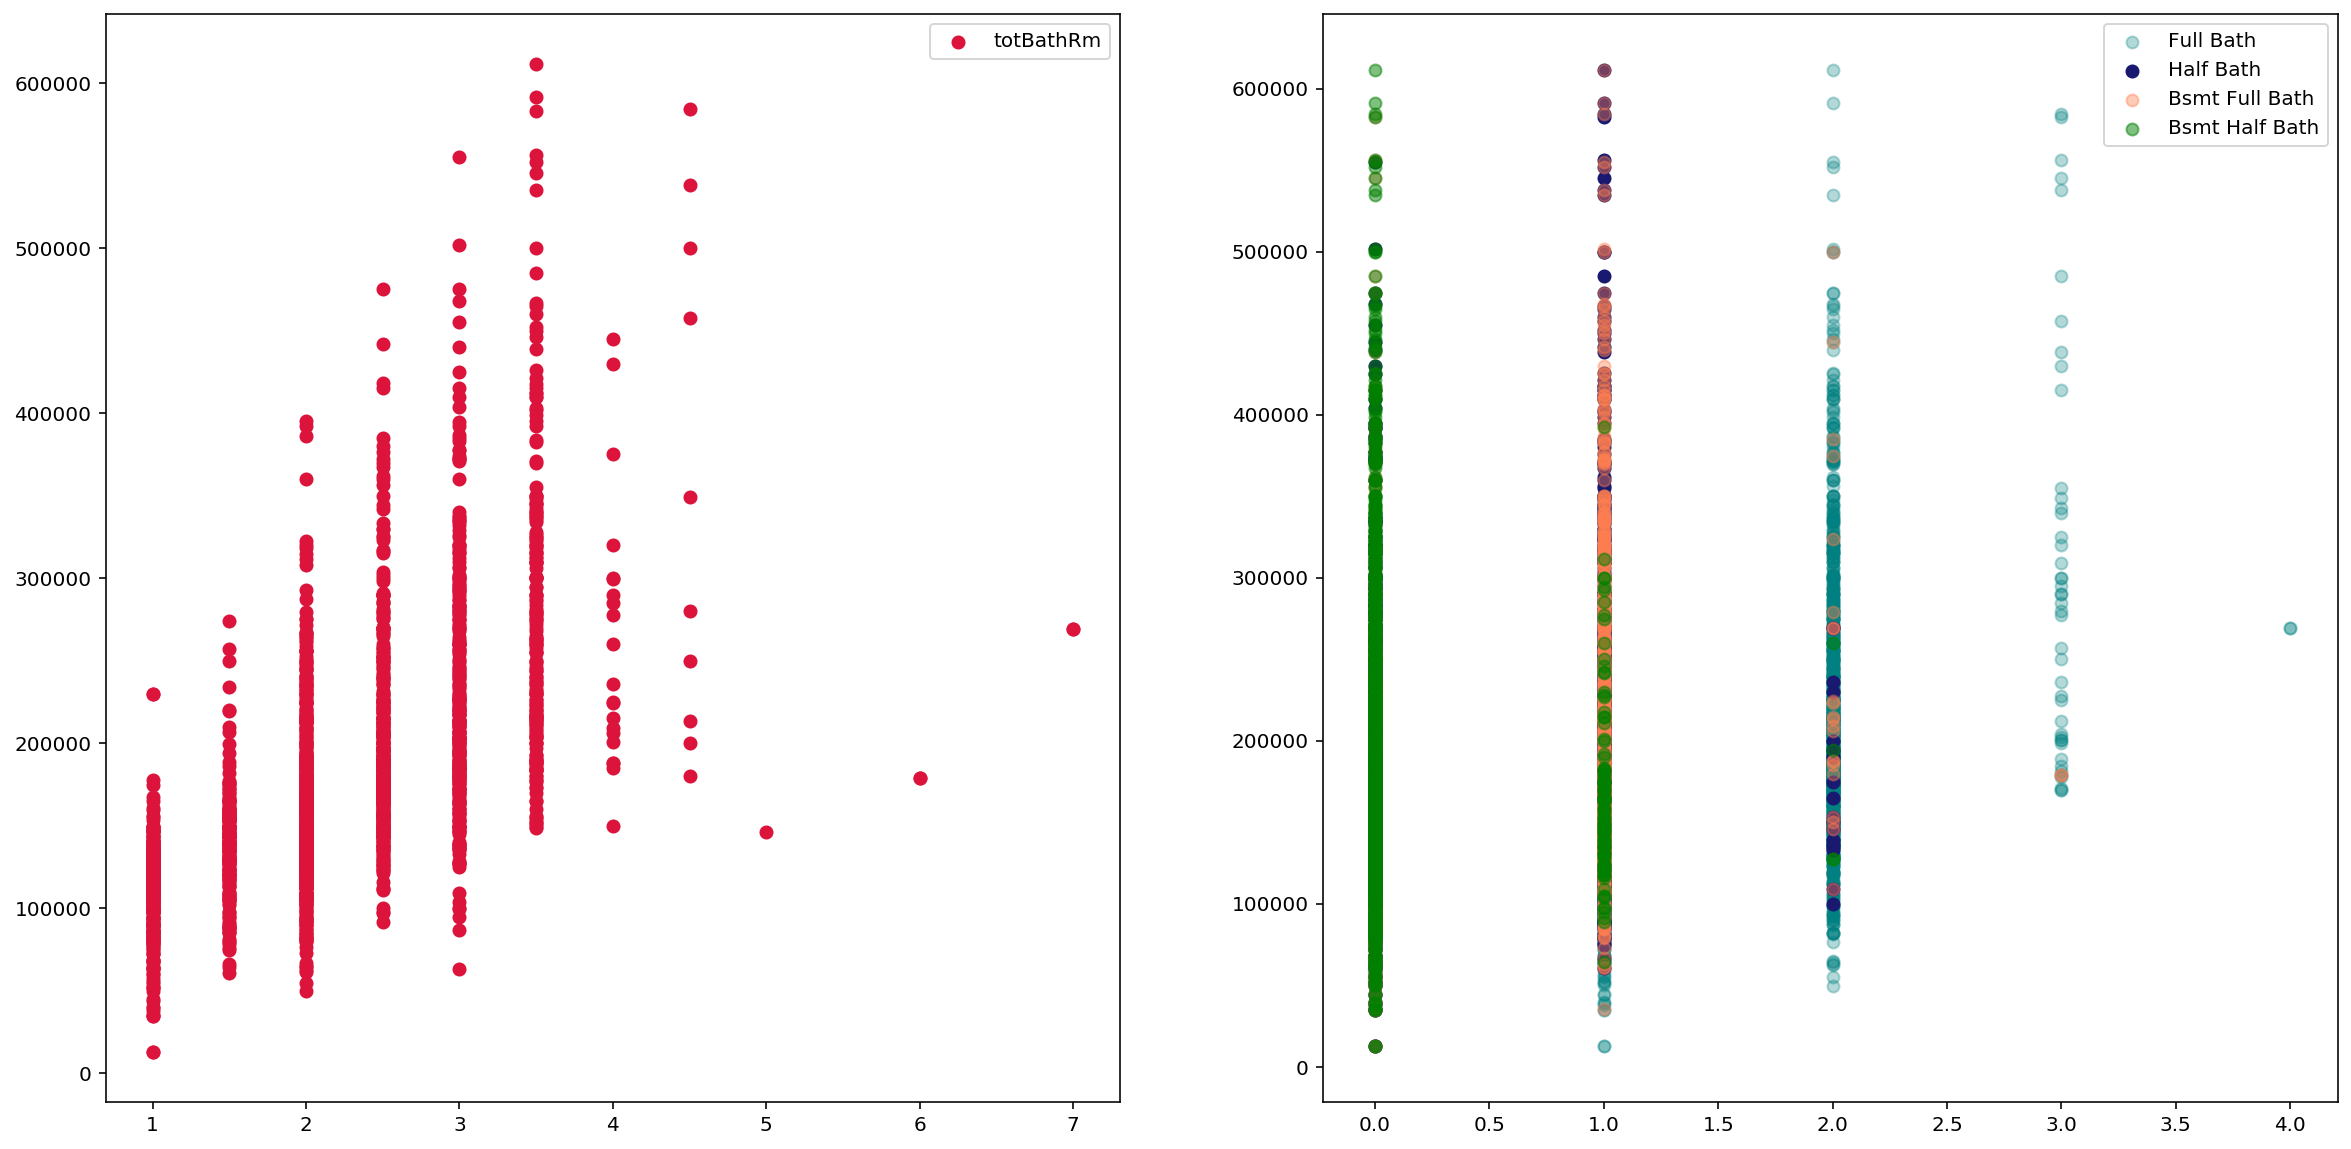

In [31]:
# checking if the newly created variable is representative of the individually merged features
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(train['totBathRm'],train['SalePrice'], color = 'crimson', label = 'totBathRm')
ax2.scatter(train['Full Bath'],train['SalePrice'], color = 'teal', alpha = 0.3, label = 'Full Bath')
ax2.scatter(train['Half Bath'],train['SalePrice'], color = 'midnightblue', label = 'Half Bath')
ax2.scatter(train['Bsmt Full Bath'],train['SalePrice'], color = 'coral', alpha = 0.4, label = 'Bsmt Full Bath')
ax2.scatter(train['Bsmt Half Bath'],train['SalePrice'], color = 'green', alpha = 0.5, label = 'Bsmt Half Bath')
ax1.legend()
ax2.legend()
plt.show()

In [32]:
train.shape

(2049, 78)

In [33]:
test.shape

(879, 77)

### Removing columns that are merged

In [34]:
# Remove variables that were used to create new features
cols_2_remove = ['Gr Liv Area','Total Bsmt SF','Year Remod/Add','Year Built','Yr Sold',
                'Full Bath','Half Bath','Bsmt Full Bath','Bsmt Half Bath','Open Porch SF','Enclosed Porch',
                 '3Ssn Porch','Screen Porch']
print(len(cols_2_remove))

train1 = train.copy()
train1.drop(cols_2_remove, axis = 1, inplace = True)

# applying the same to test dataset 
test1 = test.copy()
test1.drop(cols_2_remove, axis = 1, inplace = True)

13


In [35]:
train1.shape

(2049, 65)

In [36]:
test1.shape

(879, 64)

# Data Cleaning: Dropping Columns with significant no. of missing values :

In [37]:
for zero_values in train1:
    df_zero_values = (train1[zero_values] == 0).sum()
    if df_zero_values != 0:        
        print(f'{zero_values}: {df_zero_values} zeros')

Mas Vnr Area: 1216 zeros
Bsmt Unf SF: 165 zeros
Bedroom AbvGr: 5 zeros
Kitchen AbvGr: 2 zeros
Fireplaces: 1000 zeros
Garage Area: 113 zeros
Wood Deck SF: 1075 zeros
Pool Area: 2041 zeros
Misc Val: 1985 zeros
Age when Sold: 160 zeros
totPorchSqFt: 613 zeros


In [38]:
for zero_values in test1:
    df_zero_values = (test1[zero_values] == 0).sum()
    if df_zero_values != 0:        
        print(f'{zero_values}: {df_zero_values} zeros')

Mas Vnr Area: 532 zeros
Bsmt Unf SF: 79 zeros
Bedroom AbvGr: 3 zeros
Kitchen AbvGr: 1 zeros
Fireplaces: 422 zeros
Garage Area: 44 zeros
Wood Deck SF: 451 zeros
Pool Area: 875 zeros
Misc Val: 841 zeros
Age when Sold: 77 zeros
totPorchSqFt: 262 zeros


In [39]:
for null_values in train1:
    df_null_values = train1[null_values].isnull().sum()
    if df_null_values != 0:        
        print(f'{null_values}: {df_null_values} nulls')

Lot Frontage: 330 nulls
Alley: 1909 nulls
Mas Vnr Type: 22 nulls
Mas Vnr Area: 22 nulls
Bsmt Qual: 55 nulls
Bsmt Cond: 55 nulls
Bsmt Exposure: 58 nulls
BsmtFin Type 1: 55 nulls
BsmtFin Type 2: 56 nulls
Bsmt Unf SF: 1 nulls
Fireplace Qu: 1000 nulls
Garage Type: 113 nulls
Garage Finish: 114 nulls
Garage Area: 1 nulls
Garage Qual: 114 nulls
Garage Cond: 114 nulls
Pool QC: 2041 nulls
Fence: 1649 nulls
Misc Feature: 1985 nulls
totSqFt: 1 nulls
totBathRm: 2 nulls


In [40]:
for null_values in test1:
    df_null_values = test1[null_values].isnull().sum()
    if df_null_values != 0:        
        print(f'{null_values}: {df_null_values} nulls')

Lot Frontage: 160 nulls
Alley: 821 nulls
Mas Vnr Type: 1 nulls
Mas Vnr Area: 1 nulls
Bsmt Qual: 25 nulls
Bsmt Cond: 25 nulls
Bsmt Exposure: 25 nulls
BsmtFin Type 1: 25 nulls
BsmtFin Type 2: 25 nulls
Electrical: 1 nulls
Fireplace Qu: 422 nulls
Garage Type: 44 nulls
Garage Finish: 45 nulls
Garage Qual: 45 nulls
Garage Cond: 45 nulls
Pool QC: 875 nulls
Fence: 707 nulls
Misc Feature: 838 nulls


### Dropping Columns and its considerations: (by looking in TRAIN)
    1) 'Alley': 1911 NAs
    2) 'Fireplace Qu': 1000 NAs
    3) 'Pool QC': 2042 NAs
    4) 'Fence': 1651 NAs
    5) 'Misc Feature': 1986 Nas
    6) 'Misc Val' is highly skewed (γ1 = 20.65739778) Skewed 'Misc Val' has 1986 (96.8%) zeros
    
### Dropping columns and its considerations: (by looking in TEST)
    1) 'Alley': 821 NAs
    2) 'Fireplace_Qu': 422 NAs
    3) 'Pool QC': 875 NAs
    4) 'Fence': 707 NAs
    5) 'Misc Feature': 838 NAs
    6) 'Misc Val' is highly skewed (γ1 = 25.55366573) Skewed 'Misc Val' has 841 (95.7%) zeros

In [41]:
# Consolidating a list of columns to be dropped
dropcol = ['Alley', 'Fireplace Qu','Pool QC','Fence','Misc Feature', 'Misc Val']

In [42]:
# Dropping columns in both Train and Test Datasets
train1.drop(labels = dropcol, axis = 1, inplace = True)
test1.drop(labels = dropcol, axis = 1, inplace = True)

In [43]:
print(train1.shape)
print(test1.shape)

(2049, 59)
(879, 58)


# Data Cleaning: Handling the remaining Null and Zero Values in Datasets
Whatever we do in the train sets, we will also do in the test sets, so as to have the data sets both sorted in the same manner for evaluation on the later end

In [44]:
for zero_values in train1:
    df_zero_values = (train1[zero_values] == 0).sum()
    if df_zero_values != 0:        
        print(f'{zero_values}: {df_zero_values} zeros')

Mas Vnr Area: 1216 zeros
Bsmt Unf SF: 165 zeros
Bedroom AbvGr: 5 zeros
Kitchen AbvGr: 2 zeros
Fireplaces: 1000 zeros
Garage Area: 113 zeros
Wood Deck SF: 1075 zeros
Pool Area: 2041 zeros
Age when Sold: 160 zeros
totPorchSqFt: 613 zeros


In [45]:
for null_values in train1:
    df_null_values = train1[null_values].isnull().sum()
    if df_null_values != 0:        
        print(f'{null_values}: {df_null_values} nulls')

Lot Frontage: 330 nulls
Mas Vnr Type: 22 nulls
Mas Vnr Area: 22 nulls
Bsmt Qual: 55 nulls
Bsmt Cond: 55 nulls
Bsmt Exposure: 58 nulls
BsmtFin Type 1: 55 nulls
BsmtFin Type 2: 56 nulls
Bsmt Unf SF: 1 nulls
Garage Type: 113 nulls
Garage Finish: 114 nulls
Garage Area: 1 nulls
Garage Qual: 114 nulls
Garage Cond: 114 nulls
totSqFt: 1 nulls
totBathRm: 2 nulls


In [46]:
# Handling Lot Frontage: 330 nulls
# why will there be NA in 'Lot Frontage'
# There are no zeros or nulls in lot frontage area, hence imputing mean in all the nulls in Lot Frontage
train1['Lot Frontage'].fillna(train1['Lot Frontage'].mean(), inplace = True)
test1['Lot Frontage'].fillna(test1['Lot Frontage'].mean(), inplace = True)

In [47]:
# for 22 nulls in both 'Mas Vnr Type' and 'Mas Vnr Area', 
# if its same row, it means no Masonary Veneer, fill Na in Mas Vnr Type as 'None', Na in Mas Vnr Area = 0
# if its diff row, inconsistency in data collection, dropna. 
# checking if there are observations with 'Mas Vnr Type' = null & 'Mas Vnr Area' !=0

mask = train1[(train1['Mas Vnr Type'].isnull == True) & (train1['Mas Vnr Area'] != 0)]
mask
len(mask)

0

There are no observations when 'Mas Vnr Type' is null and 'Mas Vnr Area' is not 0. 

In [48]:
# checking if the 22 nulls in 'Mas Vnr Type' and 'Mas Vnr Area' are in the same observations:
mask = train1[(train1['Mas Vnr Type'].isnull() == True) & (train1['Mas Vnr Area'].isnull() == True)]
len(mask)

22

The 22 nulls in 'Mas Vnr Type' & 'Mas Vnr Area' are true datas, assuming that there the data was indicated as null in 'Mas Vnr Area' is supposed to be collected as zero instead of leaving it blank. 

In [49]:
# Hence, we will put 0 for the 22 null in 'Mas Vnr Area'
train1['Mas Vnr Area'].fillna(0, inplace = True)
test1['Mas Vnr Area'].fillna(0, inplace = True)

# and 'None' for the 22 null in 'Mas Vnr Type'
train1['Mas Vnr Type'].fillna('None', inplace = True)
test1['Mas Vnr Type'].fillna('None', inplace = True)

In [50]:
# checking if the 55 nulls in Bsmt Qual and Bsmt Cond are in the same observations:
mask = train1[(train1['Bsmt Qual'].isnull() == True) & (train1['Bsmt Cond'].isnull() == True)]
len(mask)

55

Since it is the same observation, we can replace them with 'NA'

In [51]:
train1['Bsmt Qual'].fillna('NA', inplace = True)
test1['Bsmt Qual'].fillna('NA', inplace = True)

train1['Bsmt Cond'].fillna('NA', inplace = True)
test1['Bsmt Cond'].fillna('NA', inplace = True)

In [52]:
# checking if the 133 nulls in Garage Type & 113 zeros in Garage Area are in the same observations:
mask = train1[(train1['Garage Type'].isnull() == True) & (train1['Garage Area'] == 0)]
len(mask)

113

Hence the 113 nulls can be fill with 'NA' since the 113 zeros are truely zero values which makes sense. 

In [53]:
train1['Garage Type'].fillna('NA', inplace = True)
test1['Garage Type'].fillna('NA', inplace = True)

In [54]:
# Filling 'NA' in respective columns whichby there is 'NA' category in the given dictionary 

train1['Bsmt Exposure'].fillna('NA', inplace = True)
test1['Bsmt Exposure'].fillna('NA', inplace = True)

train1['BsmtFin Type 1'].fillna('NA', inplace = True)
test1['BsmtFin Type 1'].fillna('NA', inplace = True)

train1['BsmtFin Type 2'].fillna('NA', inplace = True)
test1['BsmtFin Type 2'].fillna('NA', inplace = True)

In [55]:
#imputing the mean of 'Bsmt Unf SF' for the 1 null value in 'Bsmt Unf SF'
train1['Bsmt Unf SF'].fillna(train1['Bsmt Unf SF'].mean(), inplace = True)
test1['Bsmt Unf SF'].fillna(test1['Bsmt Unf SF'].mean(), inplace = True)

In [56]:
# Garage Area: 1 nulls
# Case 1: if Garage Type == None, Garage Area should = 0 
# Case 2: if Garage Type != None, null Garage Area means missing data, unable to inpute false data, hence drop.
mask = train1[(train1['Garage Area'].isnull() == True) & (train1['Garage Type'] == 'None')]
len(mask)

0

Since its Case 2, we will drop this 1 row

In [57]:
train1['Garage Area'].fillna('NA', inplace = True)

In [58]:
# identifying the observation where Garage Area is null 
train1[train1['Garage Area'] == 'NA'][['Garage Finish','Garage Type','Garage Area','Garage Cond','Garage Qual']]

,Garage Finish,Garage Type,Garage Area,Garage Cond,Garage Qual
1712,NaN,Detchd,NA,NaN,NaN


In [59]:
# There is Garage type, doesnt make sense to have any value in it. hence drop. 
train1.drop([1712],inplace = True)

In [60]:
train1.shape

(2048, 59)

In [61]:
# Garage Qual: 114 nulls
# Garage Cond: 114 nulls
# Garage Finish: 114 nulls
# check if all these 114 nulls are in the same observations
mask = train1[(train1['Garage Qual'].isnull() == True) & 
              (train1['Garage Cond'].isnull() == True) & 
              (train1['Garage Finish'].isnull() == True)]
len(mask)

113

Its 113 because we dropped 1 observation above which is part of these 114 observations.

In [62]:
# check if garage is NA in these 113 observations
mask = train1[(train1['Garage Qual'].isnull() == True) &
              (train1['Garage Cond'].isnull() == True) &
              (train1['Garage Finish'].isnull() == True) & 
              (train1['Garage Type'] == 'NA')]
len(mask)

113

The 113 null in Garage Qual, Garage Cond & Garage Finish is due to the absence in Garage Type. Hence the null values are true.

In [63]:
# filling those 113 nulls with 'NA'
train1['Garage Qual'].fillna('NA', inplace = True)
train1['Garage Cond'].fillna('NA', inplace = True)
train1['Garage Finish'].fillna('NA', inplace = True)
# do the same for test
test1['Garage Qual'].fillna('NA', inplace = True)
test1['Garage Cond'].fillna('NA', inplace = True)
test1['Garage Finish'].fillna('NA', inplace = True)

### Dropping these observations as it is less than 1% of the given no. of observations
    totSqFt: 1 nulls
    totBathRm: 2 nulls
    Bedroom AbvGr: 5 zeros
    Kitchen AbvGr: 2 zeros


In [64]:
# finding the observation with totSqFt: 1 nulls
train1[train1['totSqFt'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Pool Area,Mo Sold,Sale Type,SalePrice,Remodeled Y/N,Age when Sold,totSqFt,totPorchSqFt,totBathRm
1327,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NA,567.525391,GasA,TA,Y,FuseA,2,1,TA,4,Typ,0,Detchd,Unf,280,TA,TA,Y,0,0,4,ConLD,79000,Yes,58,NaN,0,NaN


In [65]:
train1.shape

(2048, 59)

In [66]:
# dropping the identified observation
train1.drop([1327],inplace = True)

In [67]:
train1.shape

(2047, 59)

In [68]:
# finding the observation with totBathRm: 2 nulls
# There is only 1 observation because we dropped 1 of the 2 nulls in the previous step
train1[train1['totBathRm'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Pool Area,Mo Sold,Sale Type,SalePrice,Remodeled Y/N,Age when Sold,totSqFt,totPorchSqFt,totBathRm
616,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,NA,0.0,GasA,TA,Y,SBrkr,5,1,Ex,11,Typ,2,Attchd,Unf,624,TA,TA,Y,0,0,7,WD,284700,Yes,12,3820.0,372,NaN


In [69]:
# dropping the identified observation
train1.drop([616],inplace = True)

In [70]:
train1.shape

(2046, 59)

In [71]:
# finding the observation with Bedroom AbvGr: 5 zeros
train1[train1['Bedroom AbvGr'] == 0]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Pool Area,Mo Sold,Sale Type,SalePrice,Remodeled Y/N,Age when Sold,totSqFt,totPorchSqFt,totBathRm
191,906475170,20,RL,155.000000,20064,Pave,IR1,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,8,6,Shed,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,Gd,Gd,Gd,LwQ,GLQ,0.0,GasA,Ex,Y,SBrkr,0,1,Gd,5,Typ,2,Attchd,Fin,529,TA,TA,Y,646,0,5,WD,279000,No,31,2709.0,0,2.5
346,905200490,80,RL,68.878999,10246,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Gd,Av,GLQ,Unf,0.0,GasA,Ex,Y,SBrkr,0,1,TA,3,Typ,0,Attchd,Unf,364,TA,TA,Y,88,0,5,WD,145000,Yes,5,1608.0,0,1.5
744,905200090,90,RL,60.000000,12900,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,0.0,GasA,TA,Y,SBrkr,0,2,TA,6,Typ,0,CarPort,Unf,400,Fa,TA,Y,120,0,1,WD,108959,No,39,2456.0,0,3.0
1308,527127140,120,RL,41.000000,4923,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,440.0,GasA,Ex,Y,SBrkr,0,1,Ex,5,Typ,1,Attchd,Fin,682,TA,TA,Y,0,0,8,WD,286000,Yes,6,3186.0,344,2.5
1571,533350050,20,RL,68.000000,50271,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,Unf,32.0,GasA,Gd,Y,SBrkr,0,1,Gd,5,Typ,1,Attchd,Fin,894,TA,TA,Y,857,0,11,WD,385000,Yes,19,3684.0,72,2.5


In [72]:
# dropping the identified observations
train1.drop([191],inplace = True)
train1.drop([346],inplace = True)
train1.drop([744],inplace = True)
train1.drop([1308],inplace = True)
train1.drop([1571],inplace = True)

In [73]:
train1.shape

(2041, 59)

In [74]:
## finding the observation with Kitchen AbvGr: 2 zeros
train1[train1['Kitchen AbvGr'] == 0]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Bsmt Unf SF,Heating,Heating QC,Central Air,Electrical,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Pool Area,Mo Sold,Sale Type,SalePrice,Remodeled Y/N,Age when Sold,totSqFt,totPorchSqFt,totBathRm
1137,908103320,90,RL,35.0,9400,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,Unf,0.0,GasA,TA,Y,SBrkr,4,0,TA,4,Typ,0,NA,NA,0,NA,NA,Y,0,0,10,WD,127500,No,31,1925.0,0,3.0
1519,908103310,90,RL,38.0,7840,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,Flat,Tar&Grv,Plywood,Wd Shng,BrkFace,355.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,Unf,0.0,GasA,TA,Y,SBrkr,4,0,TA,4,Typ,0,NA,NA,0,NA,NA,Y,0,0,10,WD,127500,No,31,1988.0,0,3.0


In [75]:
# dropping the identified observation
train1.drop([1137],inplace = True)
train1.drop([1519],inplace = True)

In [76]:
train1.shape

(2039, 59)

In [77]:
for null_values in train1:
    df_null_values = train1[null_values].isnull().sum()
    if df_null_values != 0:        
        print(f'{null_values}: {df_null_values} nulls')

All the nulls have been addressed

In [78]:
for zero_values in train1:
    df_zero_values = (train1[zero_values] == 0).sum()
    if df_zero_values != 0:        
        print(f'{zero_values}: {df_zero_values} zeros')

Mas Vnr Area: 1230 zeros
Bsmt Unf SF: 159 zeros
Fireplaces: 994 zeros
Garage Area: 111 zeros
Wood Deck SF: 1070 zeros
Pool Area: 2031 zeros
Age when Sold: 160 zeros
totPorchSqFt: 607 zeros


All the remaining Zero values are logically assumed to be true datas of the observation

### Checking & handling any other nulls/zero in test dataset:

In [79]:
for null_values in test1:
    df_null_values = test1[null_values].isnull().sum()
    if df_null_values != 0:        
        print(f'{null_values}: {df_null_values} nulls')

Electrical: 1 nulls


In [80]:
test1['Electrical'].describe()

count       878
unique        4
top       SBrkr
freq        814
Name: Electrical, dtype: object

In [81]:
test1['Electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [82]:
# Filling Null with mode of the 'Electrical'
train1['Garage Finish'].fillna('SBrkr', inplace = True)

In [83]:
for zero_values in train1:
    df_zero_values = (train1[zero_values] == 0).sum()
    if df_zero_values != 0:        
        print(f'{zero_values}: {df_zero_values} zeros')

Mas Vnr Area: 1230 zeros
Bsmt Unf SF: 159 zeros
Fireplaces: 994 zeros
Garage Area: 111 zeros
Wood Deck SF: 1070 zeros
Pool Area: 2031 zeros
Age when Sold: 160 zeros
totPorchSqFt: 607 zeros


All the remaining Zero values are logically assumed to be true datas of the observation

# EDA: Distribution of each columns

In [84]:
train1.shape

(2039, 59)

In [85]:
# Getting all the columns 
columns_train1 = [i for i in train1 if i != 'PID']
len(columns_train1)

58

In [86]:
# Function to plot multiple histogram using columns in a dataframe
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,100)) # You'll want to specify your figsize
    fig.tight_layout(pad=6, w_pad=0.5, h_pad=5)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
        ax[i].axhline(y=1200 , color='r')

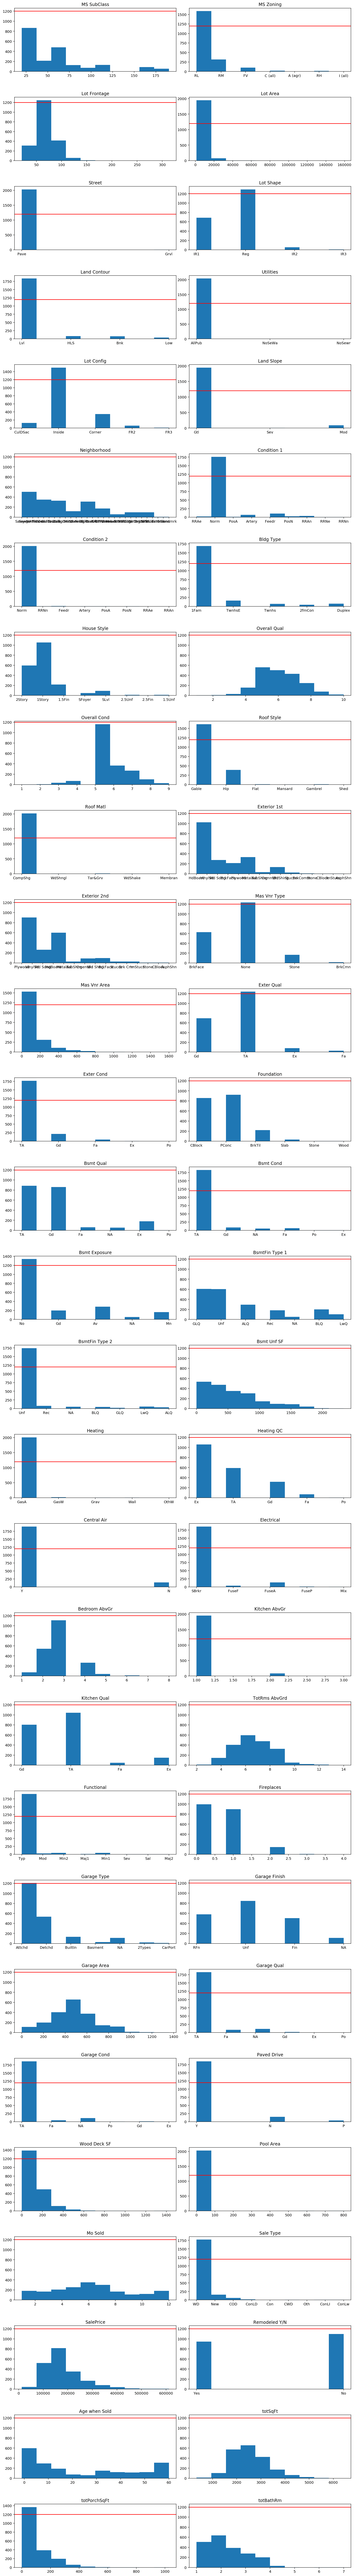

In [87]:
# Invoking Function
list_of_labels = columns_train1
list_of_columns = columns_train1
subplot_histograms(train1 ,list_of_columns,list_of_labels,list_of_xlabels=[])

Threshold is set at y=1200 (~60% of total observation), any distribution that exceeds threshold are the columns to be disregard as the collected data is very skewed towards a certain type of category within the column. 

In [88]:
selected_variables_train = ['MS SubClass','Neighborhood','House Style','Overall Qual','Overall Cond',
                            'Exterior 1st','Exterior 2nd','Foundation','Bsmt Qual','BsmtFin Type 1',
                            'Bsmt Unf SF','Heating QC','Bedroom AbvGr','Kitchen Qual','TotRms AbvGrd',
                            'Fireplaces','Garage Area','Garage Finish','Mo Sold','SalePrice',
                            'Remodeled Y/N','Age when Sold','totSqFt','totBathRm']
print(len(selected_variables_train))

selected_variables_test = ['MS SubClass','Neighborhood','House Style','Overall Qual','Overall Cond',
                           'Exterior 1st','Exterior 2nd','Foundation','Bsmt Qual','BsmtFin Type 1',
                           'Bsmt Unf SF','Heating QC','Bedroom AbvGr','Kitchen Qual','TotRms AbvGrd',
                           'Fireplaces','Garage Area','Garage Finish','Mo Sold',
                           'Remodeled Y/N','Age when Sold','totSqFt','totBathRm']
print(len(selected_variables_test))

24
23


In [89]:
# converting dtype categorical variables to str
ordinal_col = ['Overall Qual','Overall Cond','Bsmt Qual','BsmtFin Type 1','Heating QC',
               'Kitchen Qual','Garage Finish']
train1[ordinal_col] = train1[ordinal_col].astype('str')
test1[ordinal_col] = test1[ordinal_col].astype('str')

In [90]:
# Label-Encoding using mapping

train1['Bsmt Qual'] = train1['Bsmt Qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train1['BsmtFin Type 1'] = train1['BsmtFin Type 1'].map({'NA':1,'Unf':2,'LwQ':3,'Rec':4,'BLQ':5,'ALQ':6,'GLQ':7})
train1['Heating QC'] = train1['Heating QC'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train1['Kitchen Qual'] = train1['Kitchen Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train1['Garage Finish'] = train1['Garage Finish'].map({'NA':1,'Unf':2,'RFn':3,'Fin':4})

test1['Bsmt Qual'] = test1['Bsmt Qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test1['BsmtFin Type 1'] = test1['BsmtFin Type 1'].map({'NA':1,'Unf':2,'LwQ':3,'Rec':4,'BLQ':5,'ALQ':6,'GLQ':7})
test1['Heating QC'] = test1['Heating QC'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test1['Kitchen Qual'] = test1['Kitchen Qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test1['Garage Finish'] = test1['Garage Finish'].map({'NA':1,'Unf':2,'RFn':3,'Fin':4})

In [91]:
train1 = train1[selected_variables_train]
test1 = test1[selected_variables_test]
print(train1.shape)
print(test1.shape)

(2039, 24)
(879, 23)


In [92]:
train1.head(2)

,MS SubClass,Neighborhood,House Style,Overall Qual,Overall Cond,Exterior 1st,Exterior 2nd,Foundation,Bsmt Qual,BsmtFin Type 1,Bsmt Unf SF,Heating QC,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Area,Garage Finish,Mo Sold,SalePrice,Remodeled Y/N,Age when Sold,totSqFt,totBathRm
0,60,Sawyer,2Story,6,8,HdBoard,Plywood,CBlock,3,7,192.0,5,3,4,6,0,475,3,3,130500,Yes,5,2204.0,2.5
1,60,SawyerW,2Story,7,5,VinylSd,VinylSd,PConc,4,7,276.0,5,4,4,8,1,559,3,4,220000,Yes,12,3035.0,3.5


# EDA: Correlations of (selected) variables to SalePrice

In [93]:
# collating all numeric & categorical variables into a list
numeric_col = ['Bsmt Unf SF','Garage Area','Age when Sold','totSqFt','totBathRm','Bedroom AbvGr',
              'TotRms AbvGrd','SalePrice']

category_col = ['MS SubClass','Neighborhood','House Style','Overall Qual','Overall Cond',
                'Exterior 1st','Exterior 2nd','Foundation','Bsmt Qual',
                'BsmtFin Type 1','Heating QC','Bedroom AbvGr','Kitchen Qual',
                'TotRms AbvGrd','Fireplaces','Garage Finish','Mo Sold','Remodeled Y/N']

nominal_col = ['MS SubClass','Neighborhood','House Style','Exterior 1st','Exterior 2nd',
               'Foundation','Fireplaces','Mo Sold','Remodeled Y/N']

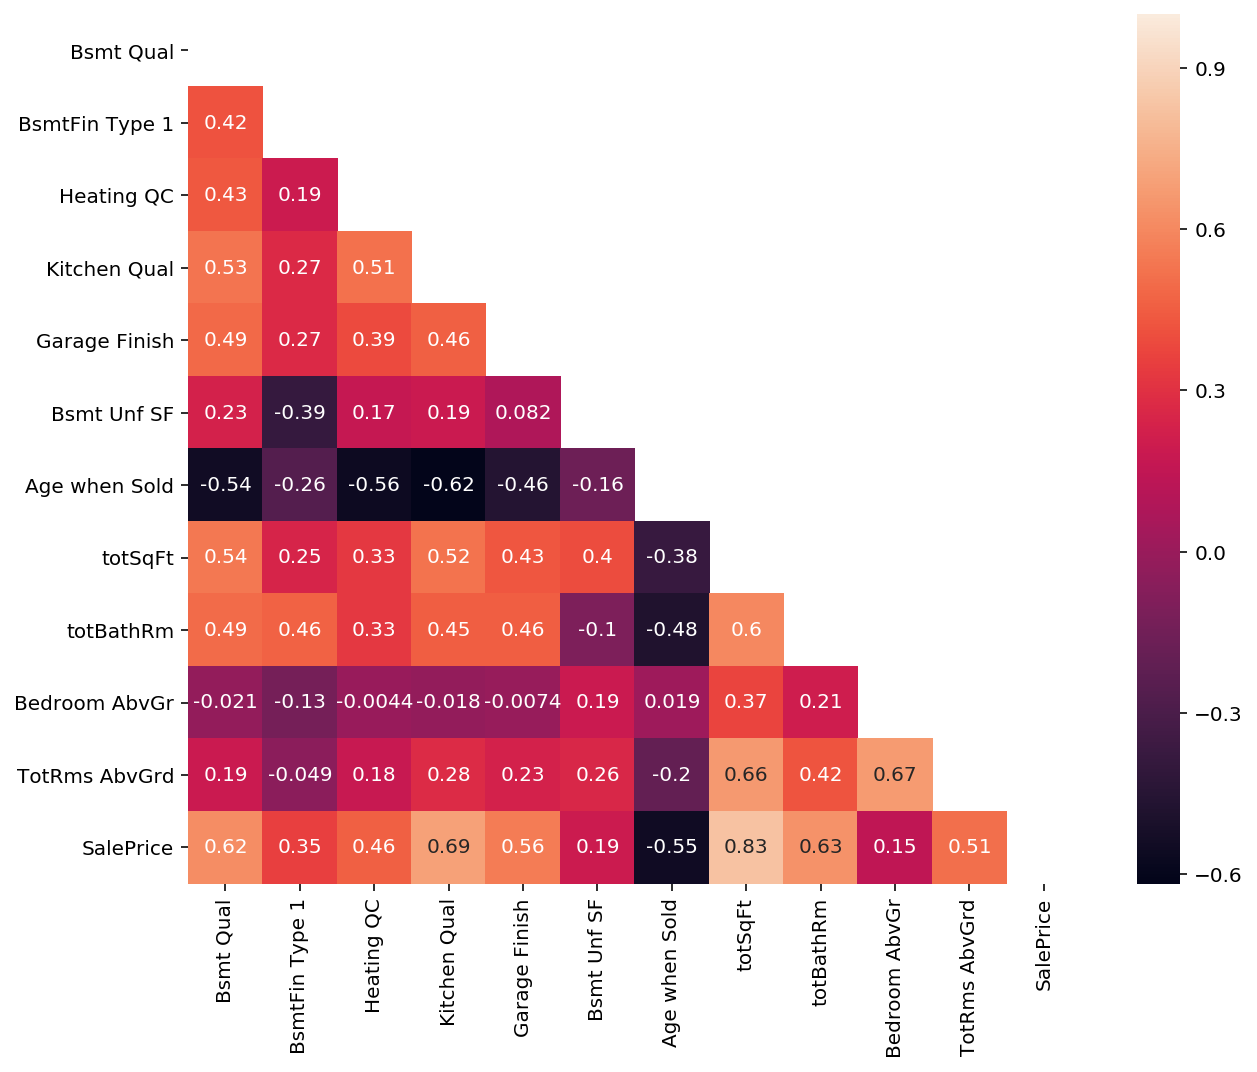

In [94]:
# checking for co-linearity for selected categorical variables
plt.figure(figsize=(10,8))
mask = np.zeros_like(train1[ordinal_col+numeric_col].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train1[ordinal_col+numeric_col].corr(), mask=mask,annot=True);
plt.show()

There are no numeric/ordinal variables that are highly co-lineared to one another. 
but there are some variabels found to be correlated to SalePrice

### Only selecting numeric/ordinal variables that are > 0.55 correlation to SalePrice
    Overall Qual   0.79
    Bsmt Qual      0.68
    Kitchen Qual   0.69
    Garage Finish  0.56
    Age when Sold  0.55
    totSqFt        0.83
    totBathRm      0.63

In [95]:
# colllating final feature selection for first trial of modelling
# above 7 selected ones + nominal 
selected_features_train = ['Overall Qual','Bsmt Qual','Kitchen Qual','Garage Finish','Age when Sold','totSqFt',
                           'totBathRm','SalePrice','MS SubClass','Neighborhood','House Style','Exterior 1st',
                           'Exterior 2nd','Foundation','Bedroom AbvGr','TotRms AbvGrd','Fireplaces',
                           'Mo Sold','Remodeled Y/N']

selected_features_test = ['Overall Qual','Bsmt Qual','Kitchen Qual','Garage Finish','Age when Sold','totSqFt',
                           'totBathRm','MS SubClass','Neighborhood','House Style','Exterior 1st','Exterior 2nd',
                           'Foundation','Bedroom AbvGr','TotRms AbvGrd','Fireplaces','Mo Sold','Remodeled Y/N']

In [96]:
train2 = train1[selected_features_train]
test2 = test1[selected_features_test]
print(train2.shape)
print(test2.shape)

(2039, 19)
(879, 18)


# EDA: One-hot encoding for Categorical Variables

In [97]:
# one-hot-encoding the nominal variables
d_train = pd.get_dummies(train2,columns=nominal_col)
d_test = pd.get_dummies(test2,columns=nominal_col)

In [98]:
print(d_train.shape)
print(d_test.shape)

(2039, 117)
(879, 111)


## Ensuring same number of columns in both train & test Datasets
#### Identifying and adding columns that are missing in test, but exist in train:

In [99]:
for i in d_train:
    if i not in d_test and i != 'SalePrice':
        d_test[i]=0
        print(i)

MS SubClass_150
Neighborhood_GrnHill
Neighborhood_Landmrk
Exterior 1st_CBlock
Exterior 1st_ImStucc
Exterior 1st_Stone
Exterior 2nd_Stone
Fireplaces_4


In [100]:
d_test.shape

(879, 119)

#### Identifying and adding columns that are missing in train, but exist in test:

In [101]:
for i in d_test:
    if i not in d_train.columns:
        d_train[i]=0
        print(i)

Exterior 1st_PreCast
Exterior 2nd_Other
Exterior 2nd_PreCast


In [102]:
d_train.shape

(2039, 120)

In [103]:
d_train.head(2)

,Overall Qual,Bsmt Qual,Kitchen Qual,Garage Finish,Age when Sold,totSqFt,totBathRm,SalePrice,Bedroom AbvGr,TotRms AbvGrd,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,Mo Sold_1,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Remodeled Y/N_No,Remodeled Y/N_Yes,Exterior 1st_PreCast,Exterior 2nd_Other,Exterior 2nd_PreCast
0,6,3,4,3,5,2204.0,2.5,130500,3,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7,4,4,3,12,3035.0,3.5,220000,4,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## Modelling: Train-Validation

In [104]:
# Selecting features, using all columns in the d_train except SalePrice
features = [i for i in d_train if i != 'SalePrice']

In [105]:
# Creating feature matrix X  and  target vector y
X_train = d_train[features]
y_train = d_train['SalePrice']

In [106]:
# Scaling
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)

In [107]:
X_train_ss.shape

(2039, 119)

In [108]:
y_train.shape

(2039,)

#### 1) Linear Regression

In [109]:
lr = LinearRegression()

In [110]:
cross_val_score(lr,X_train_ss,y_train,cv = 5).mean()

-6.539246745719383e+25

#### 2) Regularization - Ridge

In [111]:
alpha_vals = np.logspace(-5,5,100)

In [112]:
ridge_cv = RidgeCV(alphas = alpha_vals, cv=3)
ridge_cv.fit(X_train_ss,y_train)
best_alpha1 = ridge_cv.alpha_
best_alpha1

73.90722033525775

In [113]:
best_ridge = Ridge(alpha = best_alpha1)
cross_val_score(best_ridge,X_train_ss,y_train,cv=3).mean()

0.8721050761117194

#### 3) Regularization - Lasso

In [114]:
lasso_cv = LassoCV(alphas = alpha_vals, cv=3)
lasso_cv.fit(X_train_ss,y_train)
best_alpha2 = lasso_cv.alpha_
best_alpha2

599.4842503189409

In [115]:
best_lasso = Lasso(alpha = best_alpha2)
cross_val_score(best_lasso,X_train_ss,y_train,cv=3).mean()

0.87499193545699

In [116]:
lasso_coef = lasso_cv.fit(X_train_ss,y_train).coef_
len(lasso_coef)

119

#### 4) Regularization - Elastic Net

In [117]:
elasticnet_cv = ElasticNetCV(alphas=alpha_vals,cv=5)
elasticnet_cv.fit(X_train_ss,y_train)
best_alpha3 = elasticnet_cv.alpha_
best_alpha3

/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6183277296.405884, tolerance: 1020063741.4313698
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50036484015.161865, tolerance: 1020063741.4313698
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154928726970.81134, tolerance: 1020063741.4313698
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:

/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 546728409784.3859, tolerance: 1033968511.921713
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547309735637.72565, tolerance: 1033968511.921713
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547753886307.0275, tolerance: 1033968511.921713
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471:

/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3002647296.4208984, tolerance: 1050416790.780694
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27268388526.256836, tolerance: 1050416790.780694
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100509927533.8501, tolerance: 1050416790.780694
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471

/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447806143226.534, tolerance: 992995982.1586426
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448565750634.3234, tolerance: 992995982.1586426
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449159183610.1105, tolerance: 992995982.1586426
  tol, rng, random, positive)
/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: C

0.08697490026177834

In [118]:
best_elasticnet = ElasticNet(alpha=best_alpha3)
cross_val_score(best_elasticnet,X_train_ss,y_train,cv=3).mean()

0.8720993067349125

## Refining Modelling: Feature Selection

In [119]:
# making a dataframe to contain the coefficients and matching it to their respective column name
df_lasso = pd.DataFrame(lasso_coef,index=[i for i in d_train if i != 'SalePrice'],columns = ['coef'])
# Absoluting every coefficients, interested only in the magnitude
df_lasso['abs_coef'] = df_lasso['coef'].abs()
#sorting the coefficients in decending order and only choosing the top 25
features_refined = df_lasso['abs_coef'].sort_values(ascending=False).head(35).index.tolist()

df_lasso['abs_coef'].sort_values(ascending=False).head(35)

totSqFt                 31825.974053
Overall Qual            17396.094197
Neighborhood_NridgHt    10034.439041
Kitchen Qual             9296.111810
MS SubClass_120          7967.080149
Neighborhood_StoneBr     7666.764989
totBathRm                7360.713002
Bedroom AbvGr            5322.480375
MS SubClass_160          4803.884140
Neighborhood_NoRidge     4490.403078
Age when Sold            4246.927139
Foundation_Slab          4055.375691
Fireplaces_2             3883.012277
Garage Finish            3639.806819
Neighborhood_GrnHill     3139.485373
MS SubClass_90           3031.565801
Exterior 1st_CemntBd     2962.782722
Fireplaces_0             2338.313451
Neighborhood_Crawfor     2255.571552
Bsmt Qual                2146.265636
Neighborhood_OldTown     2110.594486
Foundation_BrkTil        1976.654941
TotRms AbvGrd            1547.570047
Neighborhood_NWAmes      1544.955966
Exterior 1st_BrkFace     1525.106365
Neighborhood_Somerst     1339.145066
Exterior 2nd_MetalSd     1298.875585
N

In [120]:
len(features_refined)

35

## Modelling #2 using the top coefficient selected from Lasso

In [121]:
# Creating feature matrix X  and  target vector y
X_train_1 = d_train[features_refined]
y_train_1 = d_train['SalePrice']

In [122]:
# Scaling
ss = StandardScaler()
ss.fit(X_train_1)
X_train_ss_1 = ss.transform(X_train_1)

#### Linear Regression #2

In [123]:
cross_val_score(lr,X_train_ss_1,y_train_1,cv = 5).mean()

0.8801436449882647

#### Regularization - Ridge #2

In [124]:
ridge_cv_1 = RidgeCV(alphas = alpha_vals, cv=3)
ridge_cv.fit(X_train_ss_1,y_train_1)
best_alpha1_1 = ridge_cv.alpha_
best_alpha1_1

14.508287784959402

In [125]:
best_ridge_1 = Ridge(alpha = best_alpha1_1)
cross_val_score(best_ridge_1,X_train_ss_1,y_train_1,cv=3).mean()

0.8805722745948651

#### Regularization - Lasso #2

In [126]:
lasso_cv_1 = LassoCV(alphas = alpha_vals, cv=3)
lasso_cv.fit(X_train_ss_1,y_train_1)
best_alpha2_1 = lasso_cv.alpha_
best_alpha2_1

5.72236765935022

In [127]:
best_lasso_1 = Lasso(alpha = best_alpha2_1)
cross_val_score(best_lasso_1,X_train_ss_1,y_train_1,cv=3).mean()

0.8805062022300693

In [128]:
lasso_coef_1 = lasso_cv.fit(X_train_ss_1,y_train_1).coef_
len(lasso_coef_1)

35

#### Regularization - Elastic Net #2

In [129]:
elasticnet_cv_1 = ElasticNetCV(alphas=alpha_vals,cv=5)
elasticnet_cv.fit(X_train_ss_1,y_train_1)
best_alpha3_1 = elasticnet_cv.alpha_
best_alpha3_1

0.021544346900318846

In [130]:
best_elasticnet_1 = ElasticNet(alpha=best_alpha3_1)
cross_val_score(best_elasticnet_1,X_train_ss_1,y_train_1,cv=3).mean()

0.8805722149275285

# Prediction: Select and Fitting Selected Model

#### Ridge#2 model gave us the highest score, hence we will be using that model to do prediction

In [131]:
# Scaling
ss = StandardScaler()
ss.fit(d_test)
X_test_ss = ss.transform(d_test)

In [132]:
# Fitting the model
best_ridge_1.fit(X_train_ss,y_train)

Ridge(alpha=14.508287784959402, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [133]:
# Predicting
test_predictions = best_ridge_1.predict(X_test_ss)

In [134]:
# converting the prediction array file into a dataframe and making the column named as 'SalePrice'
df_predicted_SP = pd.DataFrame(test_predictions, columns = ['SalePrice'])
# creating a column named 'Id' and using the previously dropped ID to fill as the rows input in the exact order
df_predicted_SP['Id']= test_id

# changing the arrangement of the columns in the dataframe 
title = ['Id','SalePrice']
df_predicted_SP = df_predicted_SP.reindex(columns = title)

In [135]:
df_predicted_SP.head(2)

,Id,SalePrice
0,2658,77176.551172
1,2718,209394.962671


In [136]:
# Saving and exporting file for kaggle submission
df_predicted_SP.to_csv('./datasets/target.csv',index=False)